In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import seaborn as sns
import ast

In [2]:
DATA_PATH = '/home/Data/AFAD_Dataset/'

RAW = os.path.join(DATA_PATH, 'raw/tarball/AFAD-Full')
CSV = os.path.join(DATA_PATH, 'processed')
CROPPED = os.path.join(DATA_PATH, 'interim')

In [3]:
afad_df = pd.read_csv(CSV + '/afad.csv')

In [4]:
afad_df.head()

,age,gender,file_name
0,55,1,855037-1.jpg
1,55,1,856942-0.jpg
2,55,1,858562-3.jpg
3,55,1,858197-0.jpg
4,55,1,858562-2.jpg


In [19]:
example = df.iloc[1000]

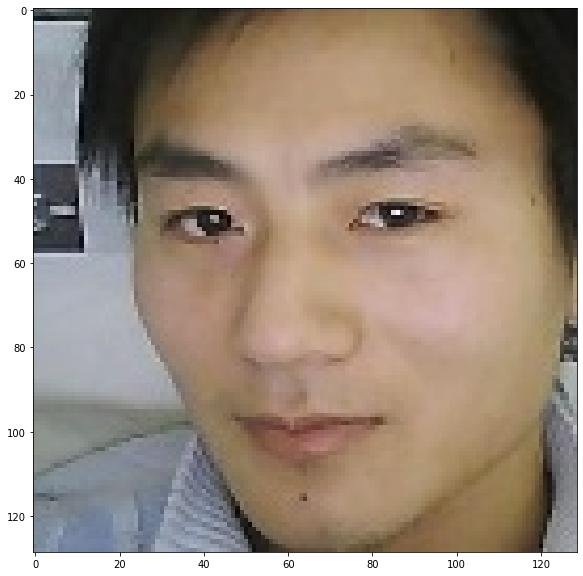

In [20]:
img = cv2.imread(os.path.join(CROPPED, example['file_name']))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

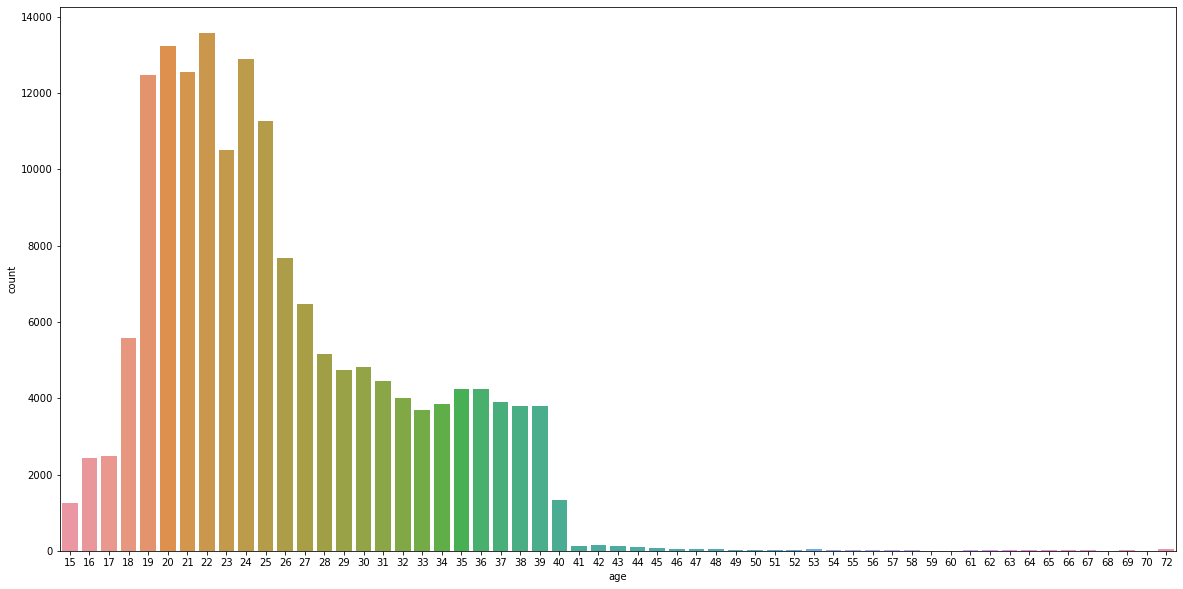

In [7]:
plt.figure(figsize=(20, 10))
sns.countplot(x="age", data=afad_df);

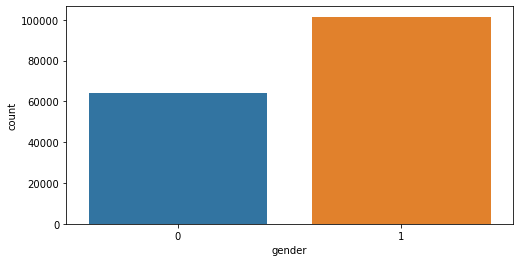

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(x="gender", data=afad_df);

In [11]:
def visualize_batch(image_ids, features):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, features)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(CROPPED, image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Age: {label[0]}, Gender: {'Male' if int(label[1]) == 1 else 'Female'}", fontsize=12)
        plt.axis("off")
    
    plt.show()

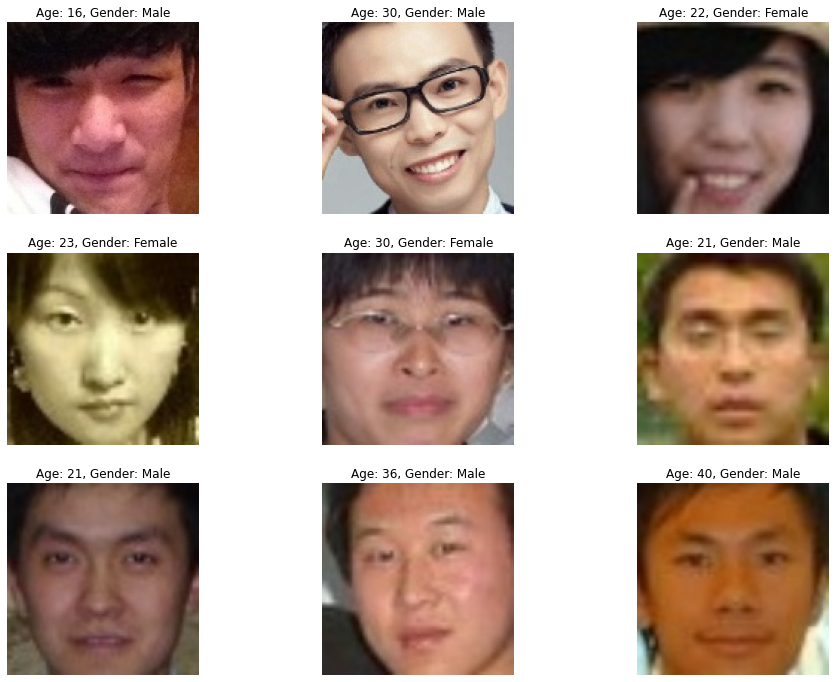

In [12]:
indexs = np.random.choice(afad_df.shape[0], size = 9, replace = False)

tmp_df = afad_df.iloc[indexs]
image_ids = tmp_df["file_name"].values
labels = tmp_df[['age', 'gender']].values

visualize_batch(image_ids, labels)